# Homework 2 (Part 2): Spectral clustering


<span style="color: red; font-size: 14pt">Soft deadline: 12.05.2024</span>

<span style="color: red; font-size: 14pt">Hard deadline: 15.05.2024 (-2 points) </span>

**Requirements**: 

- The report should be in a file: ``MDA2024-HW2-Spectral_Clustering_Part_2_<your_full_name>.ipynb``;
- It should be sent to dmitrii.ignatov@gmail.com (Dmitry Ignatov: the lecturer) and Frank Acquaye <acquayefrank@gmail.com> and Denis Pozdnyakov <dvpozdnyakov@hse.ru> (TAs) with the topic ``[MDA2024-HW2-Spectral_Clustering_Part_2]-<your_full_name>``.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.sparse.linalg import eigsh

%matplotlib inline

### 2. Meaningful Partitions of Real Datasets (100%)
"The previous example was rather compelling. However, it was also fake."

We can play with real anonymised data from Yahoo https://www.dropbox.com/s/ii1e09dx6o2ktit/yahoo.zip?dl=0 for web advertisment.

In [3]:
# reading data, 2000 companies, 3000 advertising terms, 
# 92345 connections in the graph showing that a firm buys a term
a = np.genfromtxt('/kaggle/input/yahoo-us3k2k/us.3k.2k.smat')
a = a.astype(int)
n, m, n_connections = a[0]

In [4]:
a[0:10]

array([[ 3000,  2000, 92345],
       [    0,    23,     1],
       [    0,    96,     1],
       [    0,   188,     1],
       [    0,   328,     1],
       [    0,   556,     1],
       [    0,   632,     1],
       [    0,   672,     1],
       [    0,   700,     1],
       [    0,   714,     1]])

In [5]:
a[1:, 0], a[1:, 1]

(array([   0,    0,    0, ..., 2999, 2999, 2999]),
 array([  23,   96,  188, ..., 1846, 1918, 1939]))

In [7]:
#let us put data in the adjacency matrix n x m
A_small = np.zeros((n, m))
A_small[a[1:, 0], a[1:, 1]] = 1

In [8]:
A = np.vstack(
    (np.hstack(
        (np.zeros((n, n)), A_small)
    ),
     np.hstack((A_small.T, np.zeros((m, m))))
    )
)

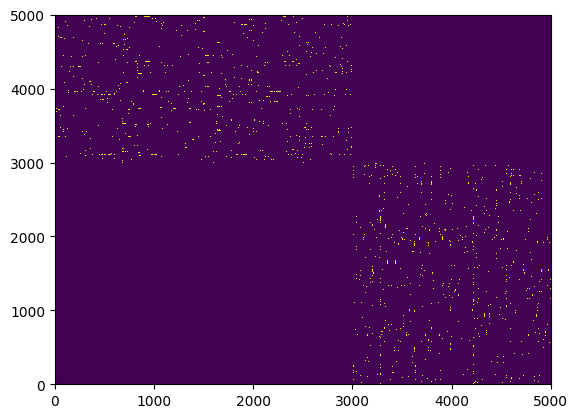

In [9]:
plt.pcolormesh(A) # adjacency matrix of a bipartite graph (inversed because of indexes)

In [10]:
# let us calcualte the number of non-zero elements (connections)
assert sum(sum(A_small)) == 92345

In [11]:
# let us read terms along with their ids
with open("/kaggle/input/yahoo-terms/us.3k.2k.trms", 'r') as iofile:
    labels = iofile.readlines()

In [12]:
labels[0]

'12a1970 lexmark\n'

Perfrom the second task from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies to find interpretable clusters of advertising terms (2-3 such clusters is enough). As an alternative out-of-the-box solution, you can use the implementation of Spectral Clustering with a given number of clusters from scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [13]:
### Your code here
# degree matrix
D = np.diag(A.sum(axis=1))

# Laplacian matrix
L = D - A

In [14]:
# eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigsh(L,which='SA')

# eigenvector corresponding to the second smallest eigenvalue
second_smallest_eigvec = eigenvectors[:, 1]

In [15]:
eigenvalues

array([-2.37557401e-14,  6.03137518e-01,  1.21876765e+00,  1.41136831e+00,
        1.48086295e+00,  1.83181136e+00])

In [16]:
second_smallest_eigvec.shape

(5000,)

In [17]:
idx = np.argsort(second_smallest_eigvec)

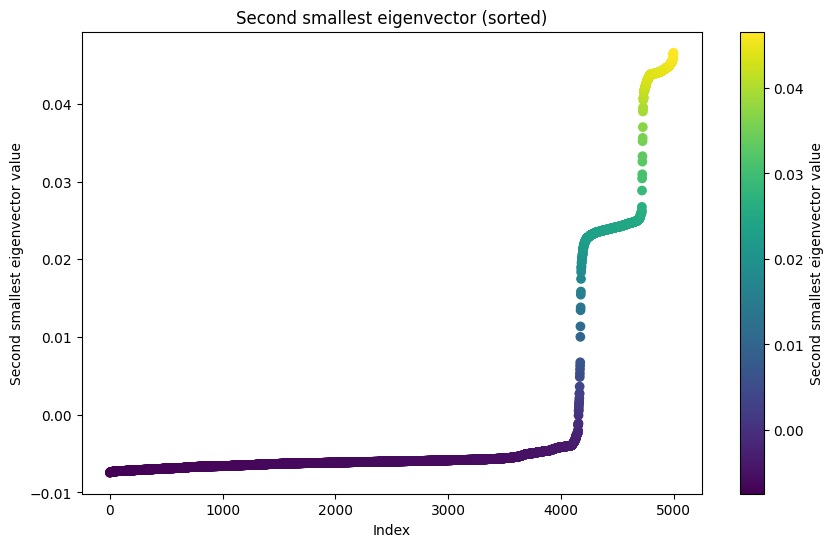

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(second_smallest_eigvec)), second_smallest_eigvec[idx], c=second_smallest_eigvec[idx], cmap='viridis', marker='o')
plt.colorbar(label='Second smallest eigenvector value')
plt.title('Second smallest eigenvector (sorted)')
plt.xlabel('Index')
plt.ylabel('Second smallest eigenvector value')
plt.show()

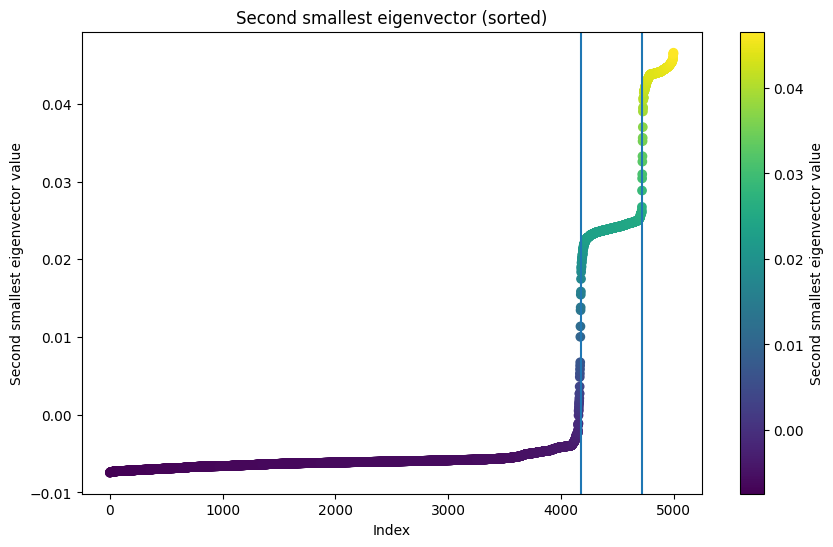

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(second_smallest_eigvec)), second_smallest_eigvec[idx], c=second_smallest_eigvec[idx], cmap='viridis', marker='o')
plt.colorbar(label='Second smallest eigenvector value')
plt.title('Second smallest eigenvector (sorted)')
plt.xlabel('Index')
plt.ylabel('Second smallest eigenvector value')
plt.axvline(4180)
plt.axvline(4720)
plt.show()

In [20]:
# separate sorted indices into company and term indices
sorted_terms = idx[idx < n]
sorted_companies = idx[idx >= n] - n

In [25]:
len(sorted_terms)

3000

In [26]:
len(sorted_companies)

2000

In [29]:
cluster_cut_1 = sorted_companies[:(4180-3000)]  
cluster_cut_2 = sorted_companies[(4180-3000):(4720-3000)] 
cluster_cut_3 = sorted_companies[(4720-3000):]  

In [30]:
print("Cluster 1 some Labels:", [labels[i].strip() for i in cluster_cut_1[:10]])
print("Cluster 2 some Labels:", [labels[i].strip() for i in cluster_cut_2[:10]])
print("Cluster 3 some Labels:", [labels[i].strip() for i in cluster_cut_3[:10]])

Cluster 1 some Labels: ['bontril cheap', 'expedition ford', 'betting football pro', 'adult movie', 'computer hardware', 'betting online sports', 'dsl', 'affiliate program web', 'gaming internet', 'fast make money']
Cluster 2 some Labels: ['ebook', 'big make money', 'basket gift unique', 'gambling offshore sport', 'america cruise holland', 'basket gourmet', 'anaheim hotel', 'domain registration', 'cartridge ink', 'casino game slot']
Cluster 3 some Labels: ['domain internet registration', 'collectible', 'california equity home loan', 'credit debt', 'falls hotel niagara', 'discount hotel', 'engine optimization search service', 'consolidation debt lender', 'glucosamine', 'engine in promotion search site web']


This is strange because I cannot indentify clusters based on plot of seconsmallest igenve